<a href="https://colab.research.google.com/github/KhaiNghiTranNguyen/AI---CNN/blob/main/CNN%20Emotion%20Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import os, numpy as np, matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.utils import to_categorical, load_img, img_to_array
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split


DATA_DIR = '/content/drive/MyDrive/nhandienkhuonmat'
IMG_SIZE = 128

In [32]:
images, labels, label_map = [], [], {}
for idx, cls in enumerate(sorted(os.listdir(DATA_DIR))):
    cls_path = os.path.join(DATA_DIR, cls)
    if not os.path.isdir(cls_path): continue
    label_map[idx] = cls
    for f in os.listdir(cls_path):
        try:
            img_path = os.path.join(cls_path, f)
            img = Image.open(img_path).convert('RGB')
            img = img.resize((IMG_SIZE, IMG_SIZE))
            images.append(np.asarray(img))
            labels.append(idx)
            print(f"Successfully loaded image: {img_path}")
        except Exception as e:
            print(f"Lỗi khi đọc ảnh {f}: {e}")

Successfully loaded image: /content/drive/MyDrive/nhandienkhuonmat/Minh đang Buồn/66.jpg
Successfully loaded image: /content/drive/MyDrive/nhandienkhuonmat/Minh đang Buồn/1.jpg
Successfully loaded image: /content/drive/MyDrive/nhandienkhuonmat/Minh đang Buồn/13.jpg
Successfully loaded image: /content/drive/MyDrive/nhandienkhuonmat/Minh đang Buồn/11.jpg
Successfully loaded image: /content/drive/MyDrive/nhandienkhuonmat/Minh đang Buồn/47.jpg
Successfully loaded image: /content/drive/MyDrive/nhandienkhuonmat/Minh đang Buồn/100.jpg
Successfully loaded image: /content/drive/MyDrive/nhandienkhuonmat/Minh đang Buồn/75.jpg
Successfully loaded image: /content/drive/MyDrive/nhandienkhuonmat/Minh đang Buồn/54.jpg
Successfully loaded image: /content/drive/MyDrive/nhandienkhuonmat/Minh đang Buồn/38.jpg
Successfully loaded image: /content/drive/MyDrive/nhandienkhuonmat/Minh đang Buồn/5.jpg
Successfully loaded image: /content/drive/MyDrive/nhandienkhuonmat/Minh đang Buồn/93.jpg


In [33]:
# Trong Cell 4
images = np.array(images) / 255.0
labels = np.array(labels)

# One-hot encode the labels
num_classes = len(label_map)

labels = to_categorical(labels, num_classes=num_classes)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42, stratify=labels) # Thêm stratify để giữ tỷ lệ lớp


Shape của labels ban đầu (sau np.array): (696,)
Số lớp (num_classes): 8
Shape của labels SAU to_categorical: (696, 8)
Shape của y_train SAU split: (556, 8)
Shape của y_test SAU split: (140, 8)


In [34]:
model = Sequential([

    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(label_map), activation='softmax')
])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 128, 128, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │       8,388,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 8)                   │           1,032 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,709,800 (33.23 MB)

 Trainable params: 8,709,800 (33.23 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


In [36]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 74s 4s/step - accuracy: 0.1654 - loss: 2.1279 - val_accuracy: 0.5857 - val_loss: 1.3022
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 80s 4s/step - accuracy: 0.4086 - loss: 1.4022 - val_accuracy: 0.8786 - val_loss: 0.3516
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 96s 5s/step - accuracy: 0.7850 - loss: 0.6147 - val_accuracy: 0.9071 - val_loss: 0.2229
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 126s 4s/step - accuracy: 0.8664 - loss: 0.3836 - val_accuracy: 0.9500 - val_loss: 0.1551
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 84s 4s/step - accuracy: 0.9048 - loss: 0.2432 - val_accuracy: 0.9857 - val_loss: 0.0564
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - accuracy: 0.9405 - loss: 0.1678 - val_accuracy: 0.9714 - val_loss: 0.0641
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - accuracy: 0.9523 - loss: 0.1317 - val_accuracy: 0.9929 - val_loss: 0.0186
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 87s 4s/step - accuracy: 0.9762 - loss: 0.1143 - val_accuracy: 0.9857 - val_loss

In [38]:
print('Accuracy:', model.evaluate(x_test, y_test, verbose=0))
model.save('/content/my_model_128.h5')

Accuracy: [0.002792990766465664, 1.0]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


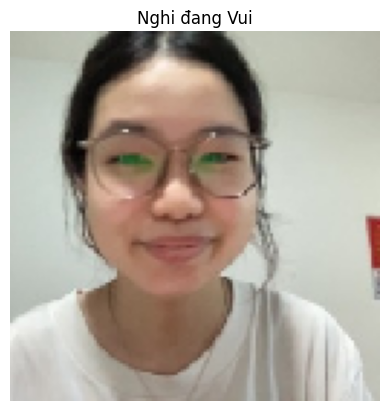

Tiên đoán là: Nghi đang Vui


In [39]:
def predict_image(path):
    img = load_img(path, target_size=(IMG_SIZE,IMG_SIZE))
    arr = img_to_array(img)/255.0
    pred = model.predict(arr.reshape(1,IMG_SIZE,IMG_SIZE,3))
    cls = np.argmax(pred)
    plt.imshow(img); plt.axis('off'); plt.title(label_map[cls]); plt.show()
    print('Tiên đoán là:', label_map[cls])

predict_image('/content/sample_data/0.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


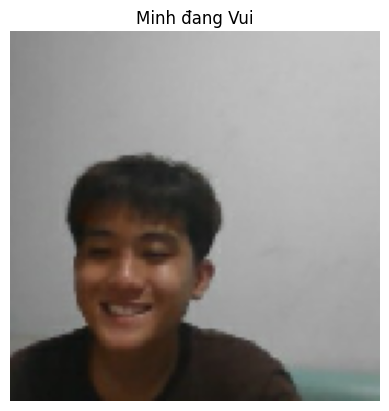

Tiên đoán là: Minh đang Vui


In [40]:
def predict_image(path):
    img = load_img(path, target_size=(IMG_SIZE,IMG_SIZE))
    arr = img_to_array(img)/255.0
    pred = model.predict(arr.reshape(1,IMG_SIZE,IMG_SIZE,3))
    cls = np.argmax(pred)
    plt.imshow(img); plt.axis('off'); plt.title(label_map[cls]); plt.show()
    print('Tiên đoán là:', label_map[cls])

predict_image('/content/sample_data/109.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


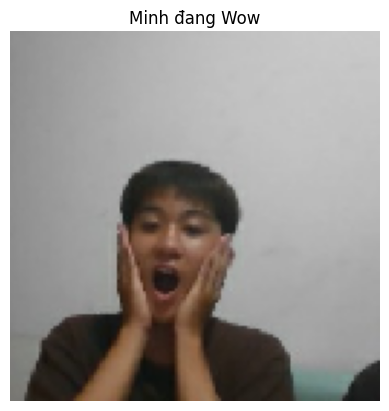

Tiên đoán là: Minh đang Wow


In [41]:
def predict_image(path):
    img = load_img(path, target_size=(IMG_SIZE,IMG_SIZE))
    arr = img_to_array(img)/255.0
    pred = model.predict(arr.reshape(1,IMG_SIZE,IMG_SIZE,3))
    cls = np.argmax(pred)
    plt.imshow(img); plt.axis('off'); plt.title(label_map[cls]); plt.show()
    print('Tiên đoán là:', label_map[cls])

predict_image('/content/sample_data/95.jpg')